# **Setup**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rwyld/Data-Science-Models/main/Modelos/PCA/HousePriceCSV.csv', sep = ';')

data = data.set_index('Id')
display(data.head(3))

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500


# **Analisis Estadistico**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   MasVnrArea     1452 non-null   float64
 3   BsmtFinSF1     1460 non-null   int64  
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   2ndFlrSF       1460 non-null   int64  
 9   LowQualFinSF   1460 non-null   int64  
 10  GrLivArea      1460 non-null   int64  
 11  GarageArea     1460 non-null   int64  
 12  WoodDeckSF     1460 non-null   int64  
 13  OpenPorchSF    1460 non-null   int64  
 14  EnclosedPorch  1460 non-null   int64  
 15  3SsnPorch      1460 non-null   int64  
 16  ScreenPorch    1460 non-null   int64  
 17  PoolArea       1460 non-null   int64  
 18  MiscVal 

In [ ]:
data.isna().sum()

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice          0
dtype: int64

In [ ]:
# Rellenando datos faltantes
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(), inplace=True)

In [ ]:
data.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,22.024023,9981.264932,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,70.049958,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


Text(0.5, 0, '')

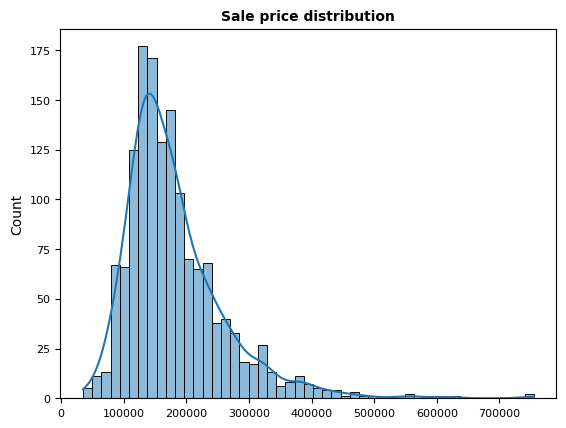

In [ ]:
ax = sns.histplot(data = data, x = data.SalePrice, stat = 'count', kde = True, alpha = 0.5)
ax.set_title('Sale price distribution', fontsize = 10, fontweight = "bold")
ax.tick_params(labelsize = 8)
ax.set_xlabel("")

# **Correlacion**

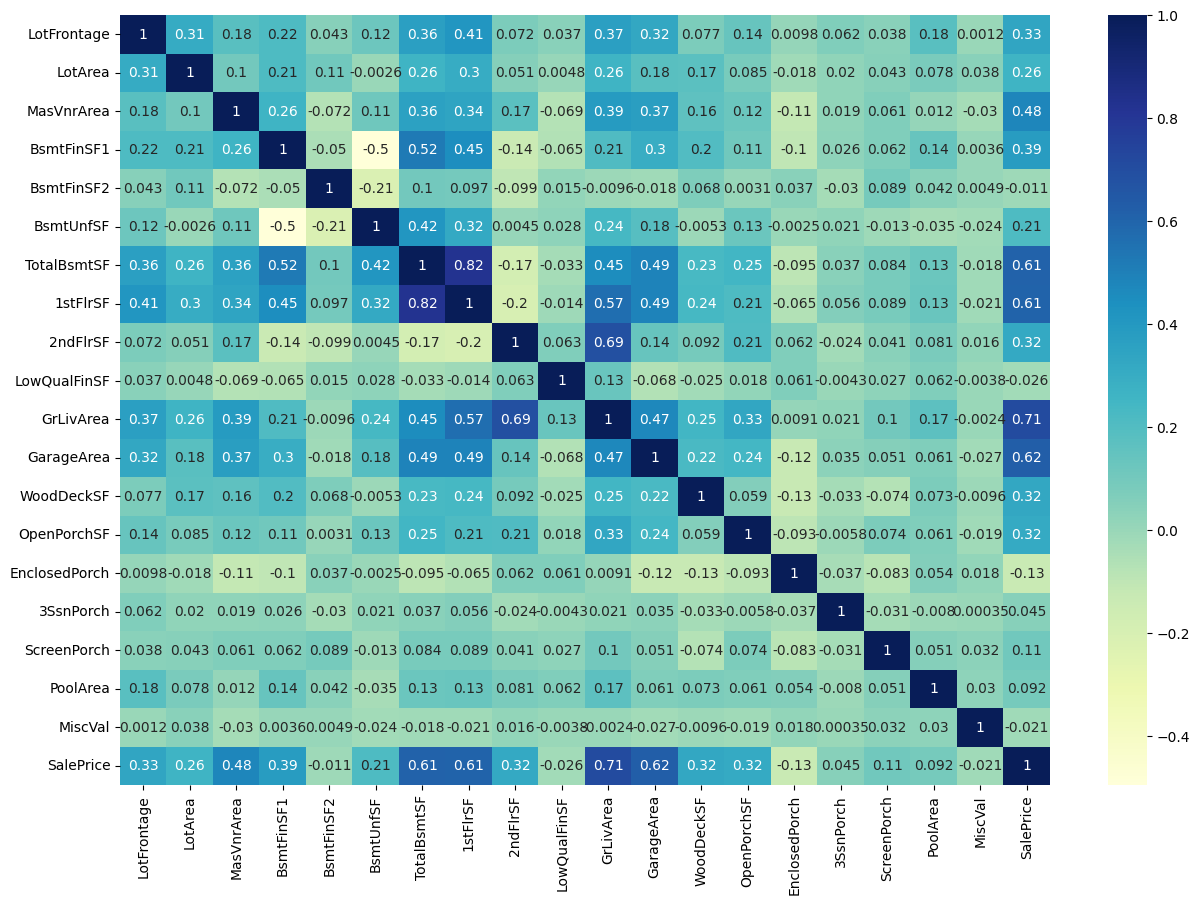

In [ ]:
corr = data.corr()

fig, ax = plt.subplots(1,1, figsize = (15,10))

ax = sns.heatmap(corr, annot=True, cmap="YlGnBu")

Segun el analisis de correlacion, los datos cercanos a 1 (Colores cercanos a azul), son candidatos a estar correlacionadas entre si. Esto es porque tienen similitudes entre si, ya que podria representar una caracteristica en concreto, en este contexto, por ejemplo las variables relacionadas al subterraneo, tienen significados similares.

# **Modelo Regresion Linear**

In [ ]:
from datetime import datetime
start=datetime.now()

X = data.drop('SalePrice', axis = 1)
y = data['SalePrice']


modelo = LinearRegression()
modelo.fit(X, y)

print(datetime.now()-start)

0:00:00.011002


# **Estandarizando**

In [ ]:
# data = pd.DataFrame(StandardScaler().fit_transform(X))

In [ ]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [ ]:
modelo_pca = pca_pipe.named_steps['pca']

df = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = data.columns,
    index   = [f"PC{num + 1}" for num in range(data.shape[1])]
)

df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
PC1,0.245063,0.186298,0.255050,0.232062,0.012145,0.127703,0.374351,0.377242,0.102944,-0.003089,0.362764,0.326916,0.173451,0.182008,-0.063873,0.025780,0.060887,0.091751,-0.009636,0.397712
PC2,-0.033619,-0.108291,0.054309,-0.424484,-0.198500,0.279130,-0.233163,-0.220241,0.607620,0.161972,0.357723,0.017322,-0.057461,0.177868,0.117301,-0.037068,-0.004291,-0.007594,-0.001449,0.099834
PC3,0.012554,0.158542,0.003850,0.348923,0.176845,-0.673187,-0.250254,-0.211496,0.357120,0.064111,0.147005,-0.048754,0.162233,0.022398,0.041725,-0.085662,0.095261,0.225277,0.090514,0.039795
PC4,0.310552,0.252435,-0.304420,-0.169810,0.353251,0.133832,0.088151,0.142270,-0.085967,0.372418,0.067711,-0.154007,-0.167107,-0.038707,0.424452,-0.023167,0.097130,0.348641,0.124414,-0.129025
PC5,-0.148264,-0.098592,-0.013430,-0.099964,0.311122,0.024195,0.034847,-0.000443,-0.031051,0.033405,-0.023030,-0.011190,-0.195031,0.283538,-0.356941,-0.231677,0.737678,-0.096851,0.058620,0.017155


In [ ]:
modelo_pca.explained_variance_ratio_

array([2.33552337e-01, 9.07728573e-02, 7.61633843e-02, 6.60348209e-02,
       5.55115981e-02, 5.28263180e-02, 5.03510776e-02, 4.96412703e-02,
       4.75137423e-02, 4.49883063e-02, 4.29137427e-02, 4.28163245e-02,
       3.60624993e-02, 3.16984500e-02, 2.84566613e-02, 2.65278147e-02,
       1.26313924e-02, 1.15374032e-02, 6.85571648e-33, 1.50832168e-33])

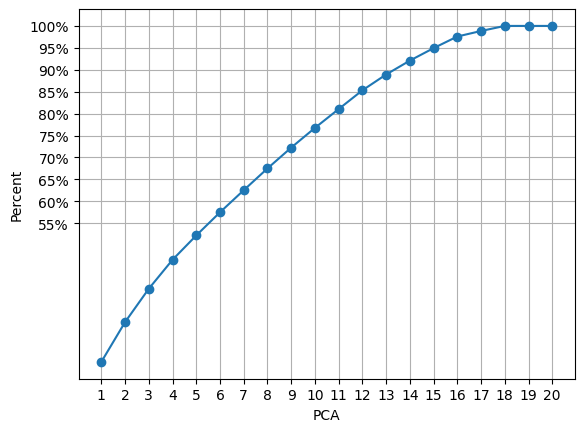

In [ ]:
plt.plot(
    range(1, len(modelo_pca.components_) + 1),
    np.cumsum(modelo_pca.explained_variance_ratio_),
    marker = "o"
)
plt.xticks(
    ticks = np.arange(data.shape[1]) + 1,
)
plt.yticks(
    ticks  = np.linspace(0.55, 1, 10),
    labels = [f"{val:0.0%}" for val in np.linspace(0.55, 1, 10)]
);

plt.ylabel('Percent')
plt.xlabel('PCA')
plt.grid()

Se deberian escoger 11 PCA, para explicar un 80% de variabilidad, ya que es la suma acumulativa del porcentaje entre el PCA 1 hasta el PCA 11.

In [ ]:
newData = pca_pipe.transform(data)

proyecciones = pd.DataFrame(
    newData,
    columns = [f"PC{num + 1}" for num in range(data.shape[1])],
    index   = data.index
)
proyecciones.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Id,,,,,,,,,,,,,,,,,,,,
1,-0.012053,0.794548,1.321619,-1.070734,-0.019385,0.577184,-0.273209,-0.134874,-0.380132,-0.091327,0.317197,0.214462,-0.688517,0.199997,0.474209,0.135061,-0.226945,0.176612,2.740181e-16,-2.904450e-16
2,0.283746,-1.751354,0.441835,-0.473166,-0.783488,-0.537486,-0.061290,-0.081084,0.868125,-0.036046,-0.075210,-0.367592,0.509344,-1.002723,-0.300975,-0.409219,-0.156590,0.153234,4.602289e-17,1.374105e-16
3,0.282812,1.104295,0.712858,-0.744898,-0.081347,0.359642,-0.032450,-0.015419,-0.399888,-0.070522,0.302775,-0.159223,-0.670167,0.067617,0.730666,0.322523,-0.280075,0.147113,1.784027e-16,-1.532490e-16


In [ ]:
modelData = proyecciones.iloc[:, 0:11]
modelData.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Id,,,,,,,,,,,
1,-0.012053,0.794548,1.321619,-1.070734,-0.019385,0.577184,-0.273209,-0.134874,-0.380132,-0.091327,0.317197
2,0.283746,-1.751354,0.441835,-0.473166,-0.783488,-0.537486,-0.061290,-0.081084,0.868125,-0.036046,-0.075210
3,0.282812,1.104295,0.712858,-0.744898,-0.081347,0.359642,-0.032450,-0.015419,-0.399888,-0.070522,0.302775


In [ ]:
from datetime import datetime
start=datetime.now()

X = modelData

modelo = LinearRegression()
modelo.fit(X, y)

print(datetime.now()-start)

0:00:00.006324


# **Interpretando**

Comparando ambos tiempos de demora obtenidos en los modelos, el que tardo menos tiempo en procesar, fue el que uso como variables predictoras los componentes principales en el modelo de Regresion Linear.

El usar componentes principales, se obtiene un procesamiento mas rapido y como su seleccion es un porcentaje de variabilidad alto, en este caso un 80%, se podria considerarse significativo para el conjunto de datos.



